In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [14]:
# data set loaded from keras
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
X_test.shape

(10000, 32, 32, 3)

In [17]:
# 3d array
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

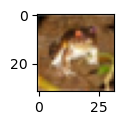

In [18]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[0])  # also ploted by the matshow

In [19]:
# image name in data set(class name..)
classes = ['airplane','automobile','bird','cat','deer','dag','frog','hourse','ship','truck']

In [20]:
#gives 2d array..

y_train[:5]  

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
# coverting 2d into 1d.. of y_train
y_train = y_train.reshape(-1,)  # reshaping

y_train[:3]

array([6, 9, 9], dtype=uint8)

In [22]:
def plot_shample(X , y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])    

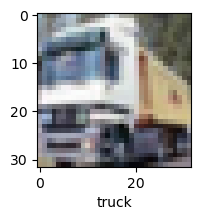

In [83]:
plot_shample(X_train, y_train, 1)

(10000, 32, 32, 3)

In [24]:
# Normalizing out data : figures pixel are in the form of rgb range(255) normalizing is a way to convert it into the rang of (0-1),,

X_train[0] # we see rgb pixel rang(255)

# normalizing and its gives much batter accuracy than the rgb form..

X_train = X_train /255
X_test = X_test/255

In [25]:
# First creats a simple (ANN) for checking the performance of model 

In [61]:
X_train.shape

(50000, 32, 32, 3)

# ANN

In [29]:
# Lets check ANN model for the computer vision check ANN gives accuracy or not..

model= keras.Sequential([  
    keras.layers.Flatten(input_shape = (32,32,3)), # flattend used for the convert 2 3d in to 1d bcz . ann input takes 1d array..
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - accuracy: 0.2734 - loss: 2.2348
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.3980 - loss: 1.6732
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.4324 - loss: 1.5919
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.4507 - loss: 1.5330
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4589 - loss: 1.5021


In [30]:
# see ANN model performing very bad for this data set. for computer vision(image detection, and show on conputer vision problems) 

model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4459 - loss: 1.5339


[1.544202446937561, 0.4424000084400177]

In [41]:
prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [42]:
prediction[:3]

array([[0.49856612, 0.28391424, 0.44457176, 0.7792539 , 0.40498447,
        0.8077071 , 0.6768669 , 0.10326891, 0.14558688, 0.15539728],
       [0.6400337 , 0.9749647 , 0.14028418, 0.06848335, 0.02004396,
        0.02732123, 0.01052574, 0.04334209, 0.8941133 , 0.9800097 ],
       [0.7847055 , 0.90711343, 0.15069127, 0.1264681 , 0.06671078,
        0.0743792 , 0.00559863, 0.11558841, 0.9302058 , 0.9060614 ]],
      dtype=float32)

In [55]:
# prediction data available in flote number.
Ann = []
for no in prediction:
    Ann.append(np.argmax(no)) # converting 2d into 1d and also flot to intezer number


In [56]:
Ann[:10]


[5, 9, 8, 9, 4, 6, 5, 6, 3, 1]

In [57]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(y_test,Ann))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50      1000
           1       0.61      0.49      0.54      1000
           2       0.42      0.17      0.24      1000
           3       0.28      0.33      0.30      1000
           4       0.51      0.23      0.32      1000
           5       0.41      0.36      0.38      1000
           6       0.42      0.66      0.51      1000
           7       0.43      0.59      0.50      1000
           8       0.69      0.47      0.56      1000
           9       0.36      0.71      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.43     10000
weighted avg       0.48      0.44      0.43     10000



In [60]:
# Ann not gives good accuracy in computer vesion problems here CNN came under the knowledge.


# CNN 

In [62]:
# CNN increased the accuracy for the computer vision problems....

In [71]:
CNN = keras.Sequential([ 
    
    # CNN layers.(this will be our dense network..)
    
        #1st layer
    keras.layers.Conv2D(filters=32,# randomely choose filter here cnn detect 32 filter and features for image..
                        kernel_size=(3,3), # this is actual filter size.
                        activation='relu',
                        input_shape = (32,32,3)# shape of X_train data..auto cnn flattend the shape.
                       ),
    keras.layers.MaxPooling2D((2,2)),# pooling used for reduce the size and overfitting of image pixel and gives accuracy to the model..
    # 2nd layer
    keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    # Dense.
    
    keras.layers.Flatten(), # no need for input_shape in ANN.CNN configure it out outomatically..
    
    keras.layers.Dense(64,activation = 'relu'),# NO need for so many deep neural netword cnn work well with 1 hidden layers..
    
    keras.layers.Dense(10, activation='softmax')  # softmax is same as(sigmoid).softmax outomatically normalized data and gives more accuracy than(sigmoid)
    ])
u

In [74]:
CNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
CNN.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3838 - loss: 1.6969
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5811 - loss: 1.1817
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6403 - loss: 1.0238
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6724 - loss: 0.9407
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6949 - loss: 0.8718


In [75]:
# now look at here and compare the accuracy with ANN and CNN. we noticed here CNN gives better accuracy than ANN
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6644 - loss: 0.9715


[0.9810150265693665, 0.6604999899864197]

In [78]:
Cnn_prediction = CNN.predict(X_test)
Cnn_prediction[:4]
# it returns data data into the form of flots. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[2.7199683e-03, 1.6330823e-03, 2.1784267e-01, 7.1928513e-01,
        2.8014772e-03, 4.6886787e-02, 4.6958034e-03, 4.4471762e-04,
        2.1447577e-03, 1.5457334e-03],
       [4.9084937e-03, 2.3669874e-02, 1.2598567e-04, 3.0070547e-05,
        2.8465009e-05, 7.1157262e-07, 2.6041103e-06, 1.4387589e-06,
        9.6744722e-01, 3.7851252e-03],
       [8.2166776e-02, 1.4224510e-01, 1.7341048e-02, 2.5792982e-02,
        6.1867833e-03, 4.1375291e-03, 2.4856175e-03, 6.2674708e-03,
        2.2631778e-01, 4.8705888e-01],
       [6.0617244e-01, 4.4134017e-02, 7.0432805e-02, 1.5772637e-02,
        1.8062735e-02, 2.7474572e-04, 3.9115115e-03, 6.7626988e-04,
        2.3936602e-01, 1.1968741e-03]], dtype=float32)

In [79]:
# comverted them into the intezer with numpy and count the max number using numpy(argmax_fuction)..
CNN_prediction = []
for no in Cnn_prediction:
    CNN_prediction.append(np.argmax(no))

In [80]:
CNN_prediction[:5]

[3, 8, 9, 0, 4]

In [82]:
# see the comaprision of the prediction of real data(y_test matches must of the time)..

In [90]:
# converting 2d data into 1d
y_test = y_test.reshape(-1) 
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

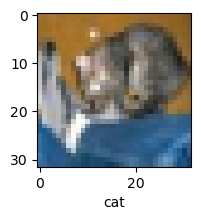

In [104]:
# real data figure

plot_shample(X_test,y_test,0)

In [103]:
# compare with predicton with precticall
classes[CNN_prediction[0]]

'cat'

In [94]:
# name of classes which available inthe data set..
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dag',
 'frog',
 'hourse',
 'ship',
 'truck']

In [105]:
from sklearn.metrics import classification_report

In [106]:
# all set now we can see the accuracy of the model here the accuracy of cnn model increases than ann model
print(classification_report(y_test,CNN_prediction))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.81      0.76      0.78      1000
           2       0.47      0.59      0.52      1000
           3       0.47      0.55      0.50      1000
           4       0.62      0.61      0.62      1000
           5       0.60      0.47      0.53      1000
           6       0.81      0.69      0.74      1000
           7       0.69      0.72      0.71      1000
           8       0.85      0.71      0.78      1000
           9       0.67      0.83      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

